<a href="https://colab.research.google.com/github/adalbertii/Modele-klasyfikacyjne/blob/main/cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [4]:
print(x_train.min(), "-", x_train.max())

0 - 255


In [5]:
x_train = (x_train / 255.0) - 0.5
x_test = (x_test / 255.0) - 0.5
print(x_train.min(), "-", x_train.max())

-0.5 - 0.5


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Convolution2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [7]:
model = Sequential([
   Convolution2D(filters=64, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'),
   Convolution2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Convolution2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
   Convolution2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
   Convolution2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
   Flatten(),
   Dense(units=512, activation="relu"),
   Dense(units=64, activation="relu"),
   Dense(units=10, activation="softmax")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                   

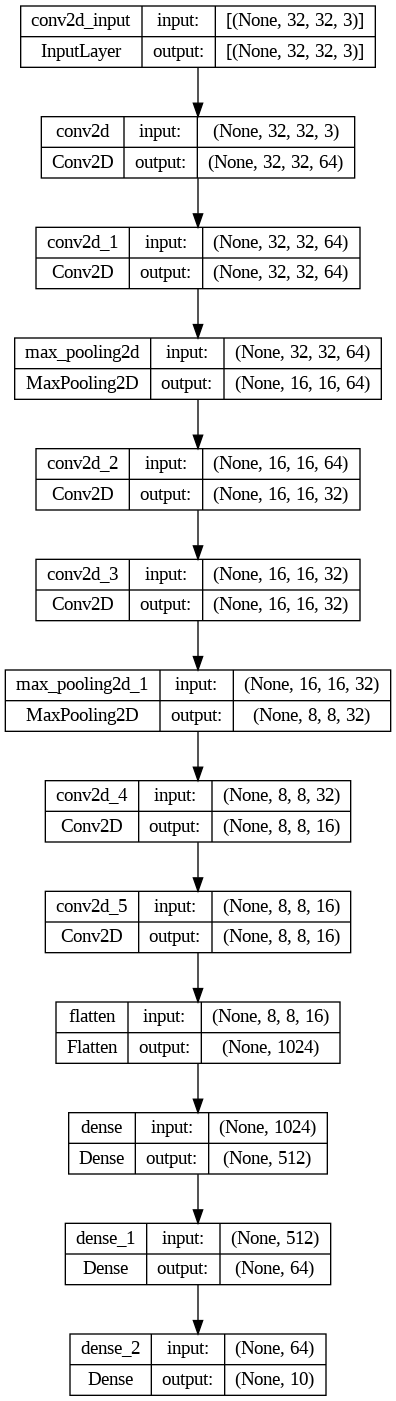

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model_info.png', show_shapes=True)

In [11]:
optim = SGD(learning_rate=0.001, momentum=0.5)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
   x_train,
   to_categorical(y_train),
   epochs=80,
   validation_split=0.15,
   verbose=1
)

In [ ]:
eval = model.evaluate(x_test, to_categorical(y_test))
eval

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
